In [123]:
# load datasets.pkl from data folder

import pickle
import tensorflow as tf
import keras
from tensorflow.keras.models import load_model
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

os.chdir('/Users/mathisjander/wwu_master/DS4/Paper/volatility_prediction')


# load best model

model = keras.models.load_model('models/best_model')

# load best_model_data.pkl

with open('data/best_model_data.pkl', 'rb') as f:
    best_model_data = pickle.load(f)

# split data into train, test, validation

X_train = best_model_data[0]
Y_train = best_model_data[1]
X_val = best_model_data[2]
Y_val = best_model_data[3]
X_test = best_model_data[4]
Y_test = best_model_data[5]

# load bundle_combinations.pkl

with open('data/bundle_combinations.pkl', 'rb') as f:
    bundle_combinations = pickle.load(f)

feature_bundle = bundle_combinations[5]
feature_bundle

['Oil_log_returns',
 'NASDAQ',
 '10Y_Treasury',
 'Consumer_Sentiment',
 'NASDAQ_log_returns',
 'Oil',
 'DJIA',
 'Gold',
 'DJIA_log_returns',
 'USD_Index_log_returns',
 'USD_Index',
 'Consumer_Sentiment_log_change',
 'RUSSELL',
 'RUSSELL_log_returns',
 'MSCI_World_log_returns',
 'Gold_log_returns',
 'EMB_Yield',
 'High_Yield_Bonds',
 'MSCI_World',
 'SP500 30 Day Volatility']

In [114]:
# create saliency heat map as average of all X_test samples

saliency_map = np.zeros((len(X_test), 200, 20))

for i in range(len(X_test)):
    input_example = X_test[i]
    input_example = np.expand_dims(input_example, axis=0)  
    input_example = tf.convert_to_tensor(input_example)
    with tf.GradientTape() as tape:
        tape.watch(input_example)
        prediction = model(input_example)
    gradients = tape.gradient(prediction, input_example)
    saliency_map[i] = np.abs(gradients)

print(saliency_map.shape)
saliency_map = np.mean(saliency_map, axis=0)
print(saliency_map.shape)



(339, 200, 20)
(200, 20)


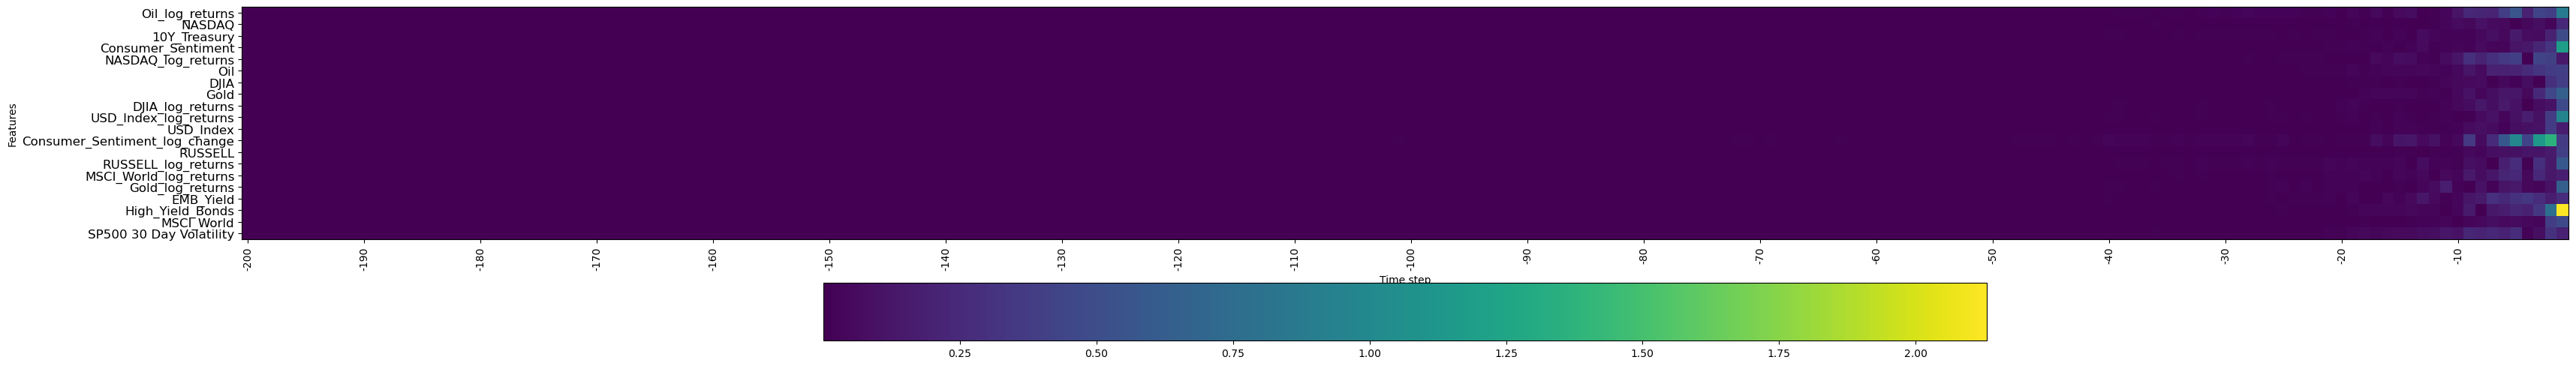

In [143]:
# plot saliency heat map

plt.figure(figsize=(40, 15))

plt.imshow(saliency_map.T, cmap='viridis')

plt.colorbar(orientation='horizontal', pad=0.05, shrink=0.5)

plt.yticks(np.arange(0, len(feature_bundle), 1), feature_bundle, fontsize=12)
plt.xticks(np.arange(0,200, 10), np.arange(-200,0,10), rotation=90, fontsize=10)

plt.xlabel('Time step', fontsize=10)
plt.ylabel('Features', fontsize=10)

#plt.title('Average Saliency for Test Set', fontsize=30)

plt.show()

According to the saliency map above, high yield bonds at time step -1 seem to have the highest average saliency value across all samples in the test set of all feature-time step combinations. Gold and Consumer Sentiment Index also seem to have a relatively high saliency value at time step -1. The Consumer Sentiment Index log change is the feature which seems to fades out the longest going backward in time steps. This could be due to the fact that the Consumer Index values are only updated monthly and therefore the actual change in the time series is less frequent. Testing this hypothesis would require a more detailed analysis in future work.

In general the saliency map shows that the model on average across all samples in the test set reacts the most strongly on only a few time steps closest to the end of the lookback period whereas most of the time steps have a saliency value close to zero. This indicates that shorter lookback periods might be sufficient to achieve similar results in predicting the target variable. This could be tested in future work.

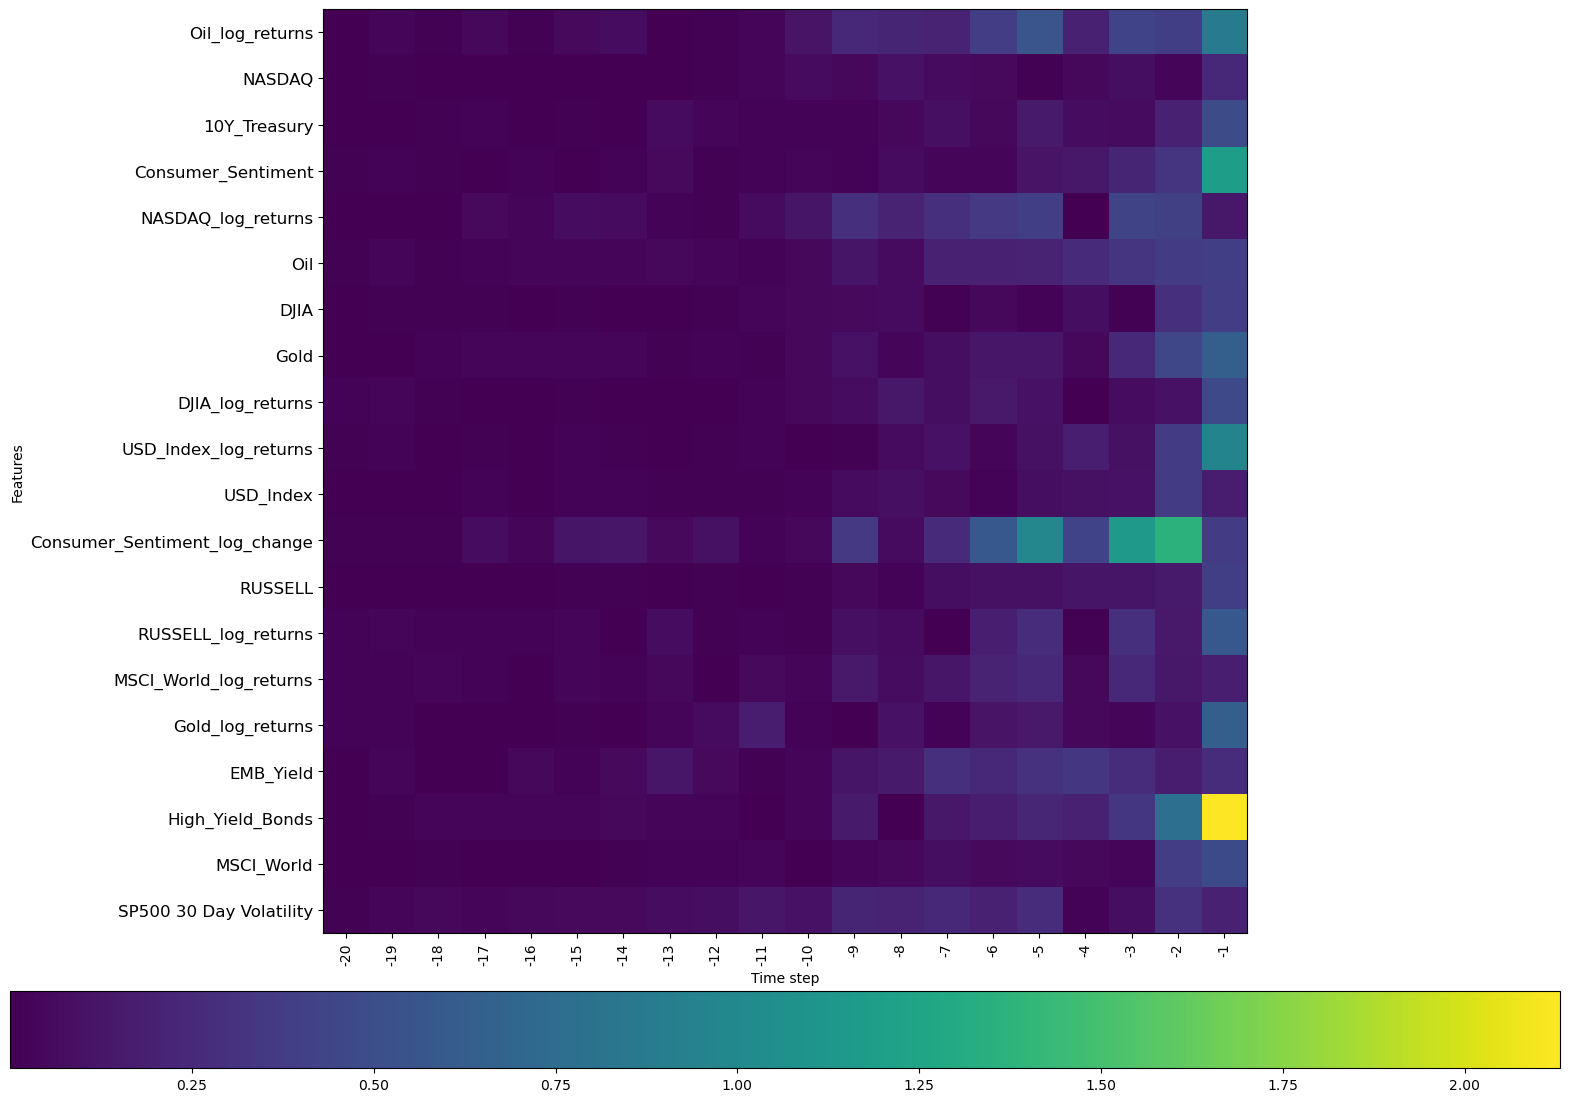

In [144]:
# plot saliency map for time step -1 until -20

plt.figure(figsize=(40, 15))

plt.imshow(saliency_map.T[:,-20:], cmap='viridis')

plt.colorbar(orientation='horizontal', pad=0.05, shrink=0.5)

plt.yticks(np.arange(0, len(feature_bundle), 1), feature_bundle, fontsize=12)
plt.xticks(np.arange(0,20, 1), np.arange(-20,0,1), rotation=90, fontsize=10)

plt.xlabel('Time step', fontsize=10)
plt.ylabel('Features', fontsize=10)

#plt.title('Average Saliency for Test Set', fontsize=30)

plt.show()